# Import all the libraries here

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred
import yfinance as yf
from datetime import datetime
%matplotlib inline
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)
# API keys
f = open("../fred_api_key.dat", "r")
fred_api = f.read()

# Get Your Data Here

In [2]:
fred = Fred(api_key=fred_api)

In [3]:
def get_ticker_data(ticker_symbol, plot=False):
    data = yf.Ticker(ticker_symbol)
    ticker = data.history(period='max')
    ticker.drop(columns=['Dividends', 'Stock Splits'], inplace=True)
    ticker.reset_index(inplace=True)

    for i in range(len(ticker['Date'])):
        ticker.iloc[i, 0] = ticker.iloc[i, 0].date()

    if plot:
        plt.plot(np.arange(0, len(ticker['Date'])), ticker['Open'])
        plt.show()

    return ticker

In [4]:
gdp = fred.get_series("GDP") # gdp of US
inflation = fred.get_series("CPIAUCSL") # CPI
unemployment = fred.get_series("UNRATE") # unemployment rate
fed_int_rate = fred.get_series("FEDFUNDS") # federal funds rate
ten_y_tres_yield = fred.get_series("DGS10") # US 10 year bond yield
m2_mon_supp = fred.get_series("M2SL") # how much money is circulationg in the economy
cons_sent_idx = fred.get_series("UMCSENT") # measures consumer confidence
ind_pro_idx = fred.get_series("INDPRO") # industrial production, total index
exports = fred.get_series("EXPGS") # exports of goods and services
imports = fred.get_series("IMPGS") # imports of goods and services
new_home_const = fred.get_series("HOUST") # new privately owned housing units
mortgage_rate = fred.get_series("MORTGAGE30US") # 30-Year Fixed Rate Mortgage Average
volatility_index = fred.get_series("VIXCLS") # CBOE Volatility Index
crude_oil_wti = fred.get_series("DCOILWTICO") # crude oil price, wti

# Definition of the columns

**Gross Domestic Product (GDP)**
- Gross domestic product (GDP), the featured measure of U.S. output, is the market value of the goods and services produced by labor and property located in the United States.For more information, see the Guide to the National Income and Product Accounts of the United States (NIPA) and the Bureau of Economic Analysis.

**Consumer Price Index for All Urban Consumers: All Items in U.S. City Average (CPIAUCSL)**
- The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a price index of a basket of goods and services paid by urban consumers. Percent changes in the price index measure the inflation rate between any two time periods. The most common inflation metric is the percent change from one year ago. It can also represent the buying habits of urban consumers. This particular index includes roughly 88 percent of the total population, accounting for wage earners, clerical workers, technical workers, self-employed, short-term workers, unemployed, retirees, and those not in the labor force.

- The CPIs are based on prices for food, clothing, shelter, and fuels; transportation fares; service fees (e.g., water and sewer service); and sales taxes. Prices are collected monthly from about 4,000 housing units and approximately 26,000 retail establishments across 87 urban areas. To calculate the index, price changes are averaged with weights representing their importance in the spending of the particular group. The index measures price changes (as a percent change) from a predetermined reference date. In addition to the original unadjusted index distributed, the Bureau of Labor Statistics also releases a seasonally adjusted index. The unadjusted series reflects all factors that may influence a change in prices. However, it can be very useful to look at the seasonally adjusted CPI, which removes the effects of seasonal changes, such as weather, school year, production cycles, and holidays.

- The CPI can be used to recognize periods of inflation and deflation. Significant increases in the CPI within a short time frame might indicate a period of inflation, and significant decreases in CPI within a short time frame might indicate a period of deflation. However, because the CPI includes volatile food and oil prices, it might not be a reliable measure of inflationary and deflationary periods. For a more accurate detection, the core CPI (CPILFESL) is often used. When using the CPI, please note that it is not applicable to all consumers and should not be used to determine relative living costs. Additionally, the CPI is a statistical measure vulnerable to sampling error since it is based on a sample of prices and not the complete average.

**Unemployment Rate (UNRATE)**
- The unemployment rate represents the number of unemployed as a percentage of the labor force. Labor force data are restricted to people 16 years of age and older, who currently reside in 1 of the 50 states or the District of Columbia, who do not reside in institutions (e.g., penal and mental facilities, homes for the aged), and who are not on active duty in the Armed Forces. This rate is also defined as the U-3 measure of labor underutilization. The series comes from the 'Current Population Survey (Household Survey)'. The source code is: LNS14000000

# Know your data here

In [5]:
gdp

1946-01-01          NaN
1946-04-01          NaN
1946-07-01          NaN
1946-10-01          NaN
1947-01-01      243.164
                ...    
2023-10-01    28296.967
2024-01-01    28624.069
2024-04-01    29016.714
2024-07-01    29374.914
2024-10-01    29719.647
Length: 316, dtype: float64

In [6]:
inflation

1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
               ...   
2024-09-01    314.851
2024-10-01    315.564
2024-11-01    316.449
2024-12-01    317.603
2025-01-01    319.086
Length: 937, dtype: float64

In [7]:
unemployment

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-09-01    4.1
2024-10-01    4.1
2024-11-01    4.2
2024-12-01    4.1
2025-01-01    4.0
Length: 925, dtype: float64

# Create dataframes here

In [8]:
df_gdp = gdp.to_frame(name="gdp").reset_index().rename(columns={"index" : "date"})
df_infl = inflation.to_frame(name="inflation").reset_index().rename(columns={"index" : "date"})
df_unem = unemployment.to_frame(name="unemployment").reset_index().rename(columns={"index" : "date"})
df_fed_rate = fed_int_rate.to_frame(name="fed_int_rate").reset_index().rename(columns={"index" : "date"})
df_ten_y_yield = ten_y_tres_yield.to_frame(name="ten_year_yield").reset_index().rename(columns={"index" : "date"})
df_m2 = m2_mon_supp.to_frame(name="m2_money_supp").reset_index().rename(columns={"index" : "date"})
df_consum_sent = cons_sent_idx.to_frame(name="consum_sent_idx").reset_index().rename(columns={"index" : "date"})
df_ind_pro = ind_pro_idx.to_frame(name="indus_pro_idx").reset_index().rename(columns={"index" : "date"})
df_exports = exports.to_frame(name="exports").reset_index().rename(columns={"index" : "date"})
df_imports = imports.to_frame(name="imports").reset_index().rename(columns={"index" : "date"})
df_new_home = new_home_const.to_frame(name="new_home_const").reset_index().rename(columns={"index" : "date"})
df_mortgage_rate = mortgage_rate.to_frame(name="mortgage_rate").reset_index().rename(columns={"index" : "date"})
df_volatility_idx = volatility_index.to_frame(name="vix").reset_index().rename(columns={"index" : "date"})
df_wti = crude_oil_wti.to_frame(name="wti").reset_index().rename(columns={"index" : "date"})

In [9]:
df_gdp

,date,gdp
0,1946-01-01,NaN
1,1946-04-01,NaN
2,1946-07-01,NaN
3,1946-10-01,NaN
4,1947-01-01,243.164
...,...,...
311,2023-10-01,28296.967
312,2024-01-01,28624.069
313,2024-04-01,29016.714
314,2024-07-01,29374.914


In [10]:
data = [df_gdp, df_fed_rate, df_ten_y_yield, df_m2, df_consum_sent, df_ind_pro, 
        df_exports, df_imports, df_new_home, df_volatility_idx, df_wti]

df_merged = df_infl.merge(df_unem, how="left", on="date")

for i in data:
    df_merged = df_merged.merge(i, how="left", on="date")

In [11]:
df_merged

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti
0,1947-01-01,21.480,NaN,243.164,NaN,NaN,NaN,NaN,13.6554,18.394,7.519,NaN,NaN,NaN
1,1947-02-01,21.620,NaN,NaN,NaN,NaN,NaN,NaN,13.7361,NaN,NaN,NaN,NaN,NaN
2,1947-03-01,22.000,NaN,NaN,NaN,NaN,NaN,NaN,13.8167,NaN,NaN,NaN,NaN,NaN
3,1947-04-01,22.000,NaN,245.968,NaN,NaN,NaN,NaN,13.7092,19.497,8.203,NaN,NaN,NaN
4,1947-05-01,21.950,NaN,NaN,NaN,NaN,NaN,NaN,13.7629,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2024-09-01,314.851,4.1,NaN,5.13,NaN,21252.4,70.1,102.5873,NaN,NaN,1355.0,NaN,NaN
933,2024-10-01,315.564,4.1,29719.647,4.83,3.74,21332.7,70.5,102.1219,3218.600,4149.659,1344.0,19.26,70.41
934,2024-11-01,316.449,4.2,NaN,4.64,4.37,21465.8,71.8,101.9736,NaN,NaN,1305.0,21.88,69.81
935,2024-12-01,317.603,4.1,NaN,4.48,NaN,21549.3,74.0,102.9833,NaN,NaN,1515.0,NaN,NaN


## Get S&P 500 data

In [12]:
sp500 = get_ticker_data("^SPX", plot=False)

/tmp/ipykernel_4390/3764776260.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1927-12-30' has dtype incompatible with datetime64[ns, America/New_York], please explicitly cast to a compatible dtype first.
  ticker.iloc[i, 0] = ticker.iloc[i, 0].date()


In [13]:
sp500

,Date,Open,High,Low,Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
24405,2025-02-28,5856.740234,5959.399902,5837.660156,5954.500000,6441140000
24406,2025-03-03,5968.330078,5986.089844,5810.910156,5849.720215,5613850000
24407,2025-03-04,5811.979980,5865.080078,5732.589844,5778.149902,6138110000
24408,2025-03-05,5781.359863,5860.589844,5742.350098,5842.629883,5285970000


In [14]:
sp500.rename(columns={"Date": "date", "Close": "sp_close"}, inplace=True)

In [15]:
sp500.head(4)

,date,Open,High,Low,sp_close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,0


In [16]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24410 entries, 0 to 24409
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      24410 non-null  object 
 1   Open      24410 non-null  float64
 2   High      24410 non-null  float64
 3   Low       24410 non-null  float64
 4   sp_close  24410 non-null  float64
 5   Volume    24410 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ MB


In [17]:
sp500["date"] = pd.to_datetime(sp500["date"])

In [18]:
df_merged = df_merged.merge(sp500, on="date", how="left")
df_merged

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,Open,High,Low,sp_close,Volume
0,1947-01-01,21.480,NaN,243.164,NaN,NaN,NaN,NaN,13.6554,18.394,7.519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1947-02-01,21.620,NaN,NaN,NaN,NaN,NaN,NaN,13.7361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1947-03-01,22.000,NaN,NaN,NaN,NaN,NaN,NaN,13.8167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1947-04-01,22.000,NaN,245.968,NaN,NaN,NaN,NaN,13.7092,19.497,8.203,NaN,NaN,NaN,15.230000,15.23000,15.230000,15.230000,0.000000e+00
4,1947-05-01,21.950,NaN,NaN,NaN,NaN,NaN,NaN,13.7629,NaN,NaN,NaN,NaN,NaN,14.690000,14.69000,14.690000,14.690000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2024-09-01,314.851,4.1,NaN,5.13,NaN,21252.4,70.1,102.5873,NaN,NaN,1355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933,2024-10-01,315.564,4.1,29719.647,4.83,3.74,21332.7,70.5,102.1219,3218.600,4149.659,1344.0,19.26,70.41,5757.729980,5757.72998,5681.279785,5708.750000,4.025180e+09
934,2024-11-01,316.449,4.2,NaN,4.64,4.37,21465.8,71.8,101.9736,NaN,NaN,1305.0,21.88,69.81,5723.220215,5772.52002,5723.220215,5728.799805,3.796450e+09
935,2024-12-01,317.603,4.1,NaN,4.48,NaN,21549.3,74.0,102.9833,NaN,NaN,1515.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# drop open, high, low and Volume
df_merged.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)

In [20]:
df_merged

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close
0,1947-01-01,21.480,NaN,243.164,NaN,NaN,NaN,NaN,13.6554,18.394,7.519,NaN,NaN,NaN,NaN
1,1947-02-01,21.620,NaN,NaN,NaN,NaN,NaN,NaN,13.7361,NaN,NaN,NaN,NaN,NaN,NaN
2,1947-03-01,22.000,NaN,NaN,NaN,NaN,NaN,NaN,13.8167,NaN,NaN,NaN,NaN,NaN,NaN
3,1947-04-01,22.000,NaN,245.968,NaN,NaN,NaN,NaN,13.7092,19.497,8.203,NaN,NaN,NaN,15.230000
4,1947-05-01,21.950,NaN,NaN,NaN,NaN,NaN,NaN,13.7629,NaN,NaN,NaN,NaN,NaN,14.690000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2024-09-01,314.851,4.1,NaN,5.13,NaN,21252.4,70.1,102.5873,NaN,NaN,1355.0,NaN,NaN,NaN
933,2024-10-01,315.564,4.1,29719.647,4.83,3.74,21332.7,70.5,102.1219,3218.600,4149.659,1344.0,19.26,70.41,5708.750000
934,2024-11-01,316.449,4.2,NaN,4.64,4.37,21465.8,71.8,101.9736,NaN,NaN,1305.0,21.88,69.81,5728.799805
935,2024-12-01,317.603,4.1,NaN,4.48,NaN,21549.3,74.0,102.9833,NaN,NaN,1515.0,NaN,NaN,NaN


In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             937 non-null    datetime64[ns]
 1   inflation        937 non-null    float64       
 2   unemployment     925 non-null    float64       
 3   gdp              312 non-null    float64       
 4   fed_int_rate     847 non-null    float64       
 5   ten_year_yield   485 non-null    float64       
 6   m2_money_supp    793 non-null    float64       
 7   consum_sent_idx  657 non-null    float64       
 8   indus_pro_idx    937 non-null    float64       
 9   exports          312 non-null    float64       
 10  imports          312 non-null    float64       
 11  new_home_const   793 non-null    float64       
 12  vix              270 non-null    float64       
 13  wti              300 non-null    float64       
 14  sp_close         600 non-null    float64  

In [22]:
df = df_merged.copy()

# Clean your data here

## Missing value imputation

In [23]:
# fill NaN values for sp_close with previous values
df["sp_close"] = df["sp_close"].ffill()
df["vix"] = df["vix"].ffill()
df["wti"] = df["wti"].ffill()

In [24]:
df

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close
0,1947-01-01,21.480,NaN,243.164,NaN,NaN,NaN,NaN,13.6554,18.394,7.519,NaN,NaN,NaN,NaN
1,1947-02-01,21.620,NaN,NaN,NaN,NaN,NaN,NaN,13.7361,NaN,NaN,NaN,NaN,NaN,NaN
2,1947-03-01,22.000,NaN,NaN,NaN,NaN,NaN,NaN,13.8167,NaN,NaN,NaN,NaN,NaN,NaN
3,1947-04-01,22.000,NaN,245.968,NaN,NaN,NaN,NaN,13.7092,19.497,8.203,NaN,NaN,NaN,15.230000
4,1947-05-01,21.950,NaN,NaN,NaN,NaN,NaN,NaN,13.7629,NaN,NaN,NaN,NaN,NaN,14.690000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2024-09-01,314.851,4.1,NaN,5.13,NaN,21252.4,70.1,102.5873,NaN,NaN,1355.0,18.59,77.74,5446.680176
933,2024-10-01,315.564,4.1,29719.647,4.83,3.74,21332.7,70.5,102.1219,3218.600,4149.659,1344.0,19.26,70.41,5708.750000
934,2024-11-01,316.449,4.2,NaN,4.64,4.37,21465.8,71.8,101.9736,NaN,NaN,1305.0,21.88,69.81,5728.799805
935,2024-12-01,317.603,4.1,NaN,4.48,NaN,21549.3,74.0,102.9833,NaN,NaN,1515.0,21.88,69.81,5728.799805


In [25]:
df1 = df.copy()

In [26]:
for i in range(0, len(df1["exports"]), 3):
    try:
        del_x = (df1["exports"][i+3] - df1["exports"][i])/3   
    except KeyError:
        break
    else:
        df1.loc[i+1, "exports"] = df1["exports"][i] + del_x
        df1.loc[i+2, "exports"] = df1["exports"][i] + 2 * del_x

In [27]:
df1

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close
0,1947-01-01,21.480,NaN,243.164,NaN,NaN,NaN,NaN,13.6554,18.394000,7.519,NaN,NaN,NaN,NaN
1,1947-02-01,21.620,NaN,NaN,NaN,NaN,NaN,NaN,13.7361,18.761667,NaN,NaN,NaN,NaN,NaN
2,1947-03-01,22.000,NaN,NaN,NaN,NaN,NaN,NaN,13.8167,19.129333,NaN,NaN,NaN,NaN,NaN
3,1947-04-01,22.000,NaN,245.968,NaN,NaN,NaN,NaN,13.7092,19.497000,8.203,NaN,NaN,NaN,15.230000
4,1947-05-01,21.950,NaN,NaN,NaN,NaN,NaN,NaN,13.7629,19.475667,NaN,NaN,NaN,NaN,14.690000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2024-09-01,314.851,4.1,NaN,5.13,NaN,21252.4,70.1,102.5873,3219.164000,NaN,1355.0,18.59,77.74,5446.680176
933,2024-10-01,315.564,4.1,29719.647,4.83,3.74,21332.7,70.5,102.1219,3218.600000,4149.659,1344.0,19.26,70.41,5708.750000
934,2024-11-01,316.449,4.2,NaN,4.64,4.37,21465.8,71.8,101.9736,NaN,NaN,1305.0,21.88,69.81,5728.799805
935,2024-12-01,317.603,4.1,NaN,4.48,NaN,21549.3,74.0,102.9833,NaN,NaN,1515.0,21.88,69.81,5728.799805


In [28]:
for i in range(0, len(df1["imports"]), 3):
    try:
        del_x = (df1["imports"][i+3] - df1["imports"][i])/3   
    except KeyError:
        break
    else:
        df1.loc[i+1, "imports"] = df1["imports"][i] + del_x
        df1.loc[i+2, "imports"] = df1["imports"][i] + 2 * del_x

In [29]:
df1

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close
0,1947-01-01,21.480,NaN,243.164,NaN,NaN,NaN,NaN,13.6554,18.394000,7.519,NaN,NaN,NaN,NaN
1,1947-02-01,21.620,NaN,NaN,NaN,NaN,NaN,NaN,13.7361,18.761667,7.747,NaN,NaN,NaN,NaN
2,1947-03-01,22.000,NaN,NaN,NaN,NaN,NaN,NaN,13.8167,19.129333,7.975,NaN,NaN,NaN,NaN
3,1947-04-01,22.000,NaN,245.968,NaN,NaN,NaN,NaN,13.7092,19.497000,8.203,NaN,NaN,NaN,15.230000
4,1947-05-01,21.950,NaN,NaN,NaN,NaN,NaN,NaN,13.7629,19.475667,8.023,NaN,NaN,NaN,14.690000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2024-09-01,314.851,4.1,NaN,5.13,NaN,21252.4,70.1,102.5873,3219.164000,4154.431,1355.0,18.59,77.74,5446.680176
933,2024-10-01,315.564,4.1,29719.647,4.83,3.74,21332.7,70.5,102.1219,3218.600000,4149.659,1344.0,19.26,70.41,5708.750000
934,2024-11-01,316.449,4.2,NaN,4.64,4.37,21465.8,71.8,101.9736,NaN,NaN,1305.0,21.88,69.81,5728.799805
935,2024-12-01,317.603,4.1,NaN,4.48,NaN,21549.3,74.0,102.9833,NaN,NaN,1515.0,21.88,69.81,5728.799805


In [30]:
for i in range(0, len(df1["gdp"]), 3):
    try:
        del_x = (df1["gdp"][i+3] - df1["gdp"][i])/3   
    except KeyError:
        break
    else:
        df1.loc[i+1, "gdp"] = df1["gdp"][i] + del_x
        df1.loc[i+2, "gdp"] = df1["gdp"][i] + 2 * del_x

In [31]:
df1

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close
0,1947-01-01,21.480,NaN,243.164000,NaN,NaN,NaN,NaN,13.6554,18.394000,7.519,NaN,NaN,NaN,NaN
1,1947-02-01,21.620,NaN,244.098667,NaN,NaN,NaN,NaN,13.7361,18.761667,7.747,NaN,NaN,NaN,NaN
2,1947-03-01,22.000,NaN,245.033333,NaN,NaN,NaN,NaN,13.8167,19.129333,7.975,NaN,NaN,NaN,NaN
3,1947-04-01,22.000,NaN,245.968000,NaN,NaN,NaN,NaN,13.7092,19.497000,8.203,NaN,NaN,NaN,15.230000
4,1947-05-01,21.950,NaN,247.173667,NaN,NaN,NaN,NaN,13.7629,19.475667,8.023,NaN,NaN,NaN,14.690000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,2024-09-01,314.851,4.1,29604.736000,5.13,NaN,21252.4,70.1,102.5873,3219.164000,4154.431,1355.0,18.59,77.74,5446.680176
933,2024-10-01,315.564,4.1,29719.647000,4.83,3.74,21332.7,70.5,102.1219,3218.600000,4149.659,1344.0,19.26,70.41,5708.750000
934,2024-11-01,316.449,4.2,NaN,4.64,4.37,21465.8,71.8,101.9736,NaN,NaN,1305.0,21.88,69.81,5728.799805
935,2024-12-01,317.603,4.1,NaN,4.48,NaN,21549.3,74.0,102.9833,NaN,NaN,1515.0,21.88,69.81,5728.799805


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             937 non-null    datetime64[ns]
 1   inflation        937 non-null    float64       
 2   unemployment     925 non-null    float64       
 3   gdp              934 non-null    float64       
 4   fed_int_rate     847 non-null    float64       
 5   ten_year_yield   485 non-null    float64       
 6   m2_money_supp    793 non-null    float64       
 7   consum_sent_idx  657 non-null    float64       
 8   indus_pro_idx    937 non-null    float64       
 9   exports          934 non-null    float64       
 10  imports          934 non-null    float64       
 11  new_home_const   793 non-null    float64       
 12  vix              420 non-null    float64       
 13  wti              466 non-null    float64       
 14  sp_close         934 non-null    float64  

In [33]:
df1["ten_year_yield"] = df1["ten_year_yield"].ffill()

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             937 non-null    datetime64[ns]
 1   inflation        937 non-null    float64       
 2   unemployment     925 non-null    float64       
 3   gdp              934 non-null    float64       
 4   fed_int_rate     847 non-null    float64       
 5   ten_year_yield   756 non-null    float64       
 6   m2_money_supp    793 non-null    float64       
 7   consum_sent_idx  657 non-null    float64       
 8   indus_pro_idx    937 non-null    float64       
 9   exports          934 non-null    float64       
 10  imports          934 non-null    float64       
 11  new_home_const   793 non-null    float64       
 12  vix              420 non-null    float64       
 13  wti              466 non-null    float64       
 14  sp_close         934 non-null    float64  

In [35]:
df_final = df1.iloc[-420:-3]
df_final

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close
517,1990-02-01,128.000,5.3,5901.810000,8.24,8.42,3179.2,89.5,62.1951,540.796333,622.764333,1437.0,24.87,22.71,328.790009
518,1990-03-01,128.600,5.2,5930.919000,8.28,8.59,3190.1,91.3,62.4916,543.360667,618.761667,1289.0,21.90,21.19,332.739990
519,1990-04-01,128.900,5.4,5960.028000,8.26,8.59,3201.6,93.9,62.3511,545.925000,614.759000,1248.0,21.90,21.19,332.739990
520,1990-05-01,129.100,5.4,5978.390667,8.18,9.08,3200.6,90.6,62.5353,548.999667,619.873333,1212.0,18.43,18.76,332.250000
521,1990-06-01,129.900,5.2,5996.753333,8.29,8.44,3213.7,88.3,62.7479,552.074333,624.987667,1177.0,17.09,17.51,363.160004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,2024-06-01,313.131,4.1,29255.514000,5.33,4.63,21079.2,68.2,103.2534,3198.301667,4129.714000,1329.0,15.39,80.70,5018.390137
930,2024-07-01,313.566,4.2,29374.914000,5.33,4.48,21093.6,66.4,102.5192,3220.292000,4163.975000,1262.0,12.22,84.70,5475.089844
931,2024-08-01,314.131,4.2,29489.825000,5.33,3.99,21182.5,67.9,103.0196,3219.728000,4159.203000,1379.0,18.59,77.74,5446.680176
932,2024-09-01,314.851,4.1,29604.736000,5.13,3.99,21252.4,70.1,102.5873,3219.164000,4154.431000,1355.0,18.59,77.74,5446.680176


# Add Categorical Columns

## Add year and month

In [36]:
df_final.loc[:, "month"] = df_final["date"].dt.strftime("%b")
df_final.loc[:, "year"] = df_final["date"].dt.year

/tmp/ipykernel_4390/2142702492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, "month"] = df_final["date"].dt.strftime("%b")
/tmp/ipykernel_4390/2142702492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, "year"] = df_final["date"].dt.year


In [37]:
def change_to_percentage(column):
    new_column = column.pct_change() * 100 # convert_to_percentage
    return new_column

In [38]:
columns = ["inflation", "gdp", "m2_money_supp", "exports", "imports", "new_home_const", "wti", "sp_close"]
new_columns = ["inflation_pct_change", "gdp_pct_change", "m2_money_supp_pct_change", "exports_pct_change", 
               "imports_pct_change", "new_home_const_pct_change", "wti_pct_change", "sp_close_pct_change"]
for i in range(len(columns)):
    df_final.loc[:, new_columns[i]] = change_to_percentage(df_final[columns[i]])

/tmp/ipykernel_4390/1274651158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, new_columns[i]] = change_to_percentage(df_final[columns[i]])
/tmp/ipykernel_4390/1274651158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, new_columns[i]] = change_to_percentage(df_final[columns[i]])
/tmp/ipykernel_4390/1274651158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [39]:
df_final.fillna(0, inplace=True)

/tmp/ipykernel_4390/1899471761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.fillna(0, inplace=True)


In [40]:
df_final

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change
517,1990-02-01,128.000,5.3,5901.810000,8.24,8.42,3179.2,89.5,62.1951,540.796333,622.764333,1437.0,24.87,22.71,328.790009,Feb,1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
518,1990-03-01,128.600,5.2,5930.919000,8.28,8.59,3190.1,91.3,62.4916,543.360667,618.761667,1289.0,21.90,21.19,332.739990,Mar,1990,0.468750,0.493222,0.342854,0.474177,-0.642726,-10.299235,-6.693087,1.201369
519,1990-04-01,128.900,5.4,5960.028000,8.26,8.59,3201.6,93.9,62.3511,545.925000,614.759000,1248.0,21.90,21.19,332.739990,Apr,1990,0.233281,0.490801,0.360490,0.471939,-0.646883,-3.180760,0.000000,0.000000
520,1990-05-01,129.100,5.4,5978.390667,8.18,9.08,3200.6,90.6,62.5353,548.999667,619.873333,1212.0,18.43,18.76,332.250000,May,1990,0.155159,0.308097,-0.031234,0.563203,0.831925,-2.884615,-11.467673,-0.147259
521,1990-06-01,129.900,5.2,5996.753333,8.29,8.44,3213.7,88.3,62.7479,552.074333,624.987667,1177.0,17.09,17.51,363.160004,Jun,1990,0.619675,0.307151,0.409298,0.560049,0.825061,-2.887789,-6.663113,9.303237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,2024-06-01,313.131,4.1,29255.514000,5.33,4.63,21079.2,68.2,103.2534,3198.301667,4129.714000,1329.0,15.39,80.70,5018.390137,Jun,2024,-0.002874,0.409801,0.315043,0.692323,0.836562,1.064639,0.000000,0.000000
930,2024-07-01,313.566,4.2,29374.914000,5.33,4.48,21093.6,66.4,102.5192,3220.292000,4163.975000,1262.0,12.22,84.70,5475.089844,Jul,2024,0.138919,0.408128,0.068314,0.687563,0.829622,-5.041384,4.956629,9.100522
931,2024-08-01,314.131,4.2,29489.825000,5.33,3.99,21182.5,67.9,103.0196,3219.728000,4159.203000,1379.0,18.59,77.74,5446.680176,Aug,2024,0.180185,0.391188,0.421455,-0.017514,-0.114602,9.270998,-8.217237,-0.518890
932,2024-09-01,314.851,4.1,29604.736000,5.13,3.99,21252.4,70.1,102.5873,3219.164000,4154.431000,1355.0,18.59,77.74,5446.680176,Sep,2024,0.229204,0.389663,0.329989,-0.017517,-0.114734,-1.740392,0.000000,0.000000


In [41]:
df_final.reset_index(drop=True, inplace=True)

In [42]:
df_final

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change
0,1990-02-01,128.000,5.3,5901.810000,8.24,8.42,3179.2,89.5,62.1951,540.796333,622.764333,1437.0,24.87,22.71,328.790009,Feb,1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1990-03-01,128.600,5.2,5930.919000,8.28,8.59,3190.1,91.3,62.4916,543.360667,618.761667,1289.0,21.90,21.19,332.739990,Mar,1990,0.468750,0.493222,0.342854,0.474177,-0.642726,-10.299235,-6.693087,1.201369
2,1990-04-01,128.900,5.4,5960.028000,8.26,8.59,3201.6,93.9,62.3511,545.925000,614.759000,1248.0,21.90,21.19,332.739990,Apr,1990,0.233281,0.490801,0.360490,0.471939,-0.646883,-3.180760,0.000000,0.000000
3,1990-05-01,129.100,5.4,5978.390667,8.18,9.08,3200.6,90.6,62.5353,548.999667,619.873333,1212.0,18.43,18.76,332.250000,May,1990,0.155159,0.308097,-0.031234,0.563203,0.831925,-2.884615,-11.467673,-0.147259
4,1990-06-01,129.900,5.2,5996.753333,8.29,8.44,3213.7,88.3,62.7479,552.074333,624.987667,1177.0,17.09,17.51,363.160004,Jun,1990,0.619675,0.307151,0.409298,0.560049,0.825061,-2.887789,-6.663113,9.303237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2024-06-01,313.131,4.1,29255.514000,5.33,4.63,21079.2,68.2,103.2534,3198.301667,4129.714000,1329.0,15.39,80.70,5018.390137,Jun,2024,-0.002874,0.409801,0.315043,0.692323,0.836562,1.064639,0.000000,0.000000
413,2024-07-01,313.566,4.2,29374.914000,5.33,4.48,21093.6,66.4,102.5192,3220.292000,4163.975000,1262.0,12.22,84.70,5475.089844,Jul,2024,0.138919,0.408128,0.068314,0.687563,0.829622,-5.041384,4.956629,9.100522
414,2024-08-01,314.131,4.2,29489.825000,5.33,3.99,21182.5,67.9,103.0196,3219.728000,4159.203000,1379.0,18.59,77.74,5446.680176,Aug,2024,0.180185,0.391188,0.421455,-0.017514,-0.114602,9.270998,-8.217237,-0.518890
415,2024-09-01,314.851,4.1,29604.736000,5.13,3.99,21252.4,70.1,102.5873,3219.164000,4154.431000,1355.0,18.59,77.74,5446.680176,Sep,2024,0.229204,0.389663,0.329989,-0.017517,-0.114734,-1.740392,0.000000,0.000000


## Other Categories

In [43]:
# market trend
def market_trend(change):
    if change > 2:
        return "Bullish"
    elif change < -2:
        return "Bearish"
    else:
        return "Neutral"

# economic cycle
def economic_cycle(gdp_growth):
    if gdp_growth > 0.8:
        return "Boom"
    elif 0 < gdp_growth <= 0.8:
        return "Expansion"
    elif -0.2 < gdp_growth <= 0:
        return "Slowdown"
    else:
        return "Recession"

# inflation category
def inflation_category(inflation):
    if inflation < 0.10:
        return "Low"
    elif 0.10 <= inflation < 0.25:
        return "Moderate"
    else:
        return "High"

# fed interest rate category
def interest_rate_category(rate):
    if rate < 2:
        return "Dovish"  # Lower rates
    elif 2 <= rate < 4:
        return "Neutral"
    else:
        return "Hawkish"  # Higher rates

# global crisis period
def crisis_period(date):
    if date.year in [2008, 2009, 2010]:  
        return "Financial Crisis"
    elif date.year in [2020, 2021]:
        return "COVID-19"
    elif date.year in [2022, 2023, 2024]:
        return "Russia-Ukraine crisis"
    else:
        return "Stable"

In [44]:
df_final.loc[:, 'market_trend'] = df_final['sp_close_pct_change'].apply(market_trend)
df_final.loc[:, 'economic_cycle'] = df_final['gdp_pct_change'].apply(economic_cycle)
df_final.loc[:, 'inflation_category'] = df_final['inflation_pct_change'].apply(inflation_category)
df_final.loc[:, 'interest_rate_category'] = df_final['fed_int_rate'].apply(interest_rate_category)
df_final.loc[:, 'crisis_period'] = df_final['date'].apply(crisis_period)

/tmp/ipykernel_4390/971070363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, 'market_trend'] = df_final['sp_close_pct_change'].apply(market_trend)
/tmp/ipykernel_4390/971070363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, 'economic_cycle'] = df_final['gdp_pct_change'].apply(economic_cycle)
/tmp/ipykernel_4390/971070363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

## Create Quarters

In [45]:
df_final.loc[:, 'quarter'] = df_final['date'].dt.quarter.map({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'})

/tmp/ipykernel_4390/1641405665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, 'quarter'] = df_final['date'].dt.quarter.map({1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'})


In [46]:
df_final

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter
0,1990-02-01,128.000,5.3,5901.810000,8.24,8.42,3179.2,89.5,62.1951,540.796333,622.764333,1437.0,24.87,22.71,328.790009,Feb,1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral,Slowdown,Low,Hawkish,Stable,Q1
1,1990-03-01,128.600,5.2,5930.919000,8.28,8.59,3190.1,91.3,62.4916,543.360667,618.761667,1289.0,21.90,21.19,332.739990,Mar,1990,0.468750,0.493222,0.342854,0.474177,-0.642726,-10.299235,-6.693087,1.201369,Neutral,Expansion,High,Hawkish,Stable,Q1
2,1990-04-01,128.900,5.4,5960.028000,8.26,8.59,3201.6,93.9,62.3511,545.925000,614.759000,1248.0,21.90,21.19,332.739990,Apr,1990,0.233281,0.490801,0.360490,0.471939,-0.646883,-3.180760,0.000000,0.000000,Neutral,Expansion,Moderate,Hawkish,Stable,Q2
3,1990-05-01,129.100,5.4,5978.390667,8.18,9.08,3200.6,90.6,62.5353,548.999667,619.873333,1212.0,18.43,18.76,332.250000,May,1990,0.155159,0.308097,-0.031234,0.563203,0.831925,-2.884615,-11.467673,-0.147259,Neutral,Expansion,Moderate,Hawkish,Stable,Q2
4,1990-06-01,129.900,5.2,5996.753333,8.29,8.44,3213.7,88.3,62.7479,552.074333,624.987667,1177.0,17.09,17.51,363.160004,Jun,1990,0.619675,0.307151,0.409298,0.560049,0.825061,-2.887789,-6.663113,9.303237,Bullish,Expansion,High,Hawkish,Stable,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2024-06-01,313.131,4.1,29255.514000,5.33,4.63,21079.2,68.2,103.2534,3198.301667,4129.714000,1329.0,15.39,80.70,5018.390137,Jun,2024,-0.002874,0.409801,0.315043,0.692323,0.836562,1.064639,0.000000,0.000000,Neutral,Expansion,Low,Hawkish,Russia-Ukraine crisis,Q2
413,2024-07-01,313.566,4.2,29374.914000,5.33,4.48,21093.6,66.4,102.5192,3220.292000,4163.975000,1262.0,12.22,84.70,5475.089844,Jul,2024,0.138919,0.408128,0.068314,0.687563,0.829622,-5.041384,4.956629,9.100522,Bullish,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3
414,2024-08-01,314.131,4.2,29489.825000,5.33,3.99,21182.5,67.9,103.0196,3219.728000,4159.203000,1379.0,18.59,77.74,5446.680176,Aug,2024,0.180185,0.391188,0.421455,-0.017514,-0.114602,9.270998,-8.217237,-0.518890,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3
415,2024-09-01,314.851,4.1,29604.736000,5.13,3.99,21252.4,70.1,102.5873,3219.164000,4154.431000,1355.0,18.59,77.74,5446.680176,Sep,2024,0.229204,0.389663,0.329989,-0.017517,-0.114734,-1.740392,0.000000,0.000000,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3


# Simple statistics of the final data

In [47]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       417 non-null    datetime64[ns]
 1   inflation                  417 non-null    float64       
 2   unemployment               417 non-null    float64       
 3   gdp                        417 non-null    float64       
 4   fed_int_rate               417 non-null    float64       
 5   ten_year_yield             417 non-null    float64       
 6   m2_money_supp              417 non-null    float64       
 7   consum_sent_idx            417 non-null    float64       
 8   indus_pro_idx              417 non-null    float64       
 9   exports                    417 non-null    float64       
 10  imports                    417 non-null    float64       
 11  new_home_const             417 non-null    float64       
 12  vix     

In [48]:
df_final.describe().T

,count,mean,min,25%,50%,75%,max,std
date,417,2007-06-01 14:30:12.949640192,1990-02-01 00:00:00,1998-10-01 00:00:00,2007-06-01 00:00:00,2016-02-01 00:00:00,2024-10-01 00:00:00,NaN
inflation,417.0,206.725432,128.0,163.9,207.234,238.034,315.564,48.273425
unemployment,417.0,5.723022,3.4,4.4,5.4,6.7,14.8,1.751345
gdp,417.0,14577.717899,5901.81,9293.991,14402.082,18587.856,29719.647,6234.821876
fed_int_rate,417.0,2.82,0.05,0.2,2.4,5.24,8.29,2.355875
ten_year_yield,417.0,4.233741,0.62,2.58,4.06,5.8,9.08,1.972756
m2_money_supp,417.0,9125.4494,3179.2,4307.9,7288.1,12557.6,21724.3,5635.87673
consum_sent_idx,417.0,85.258993,50.0,75.3,88.1,95.1,112.0,13.355794
indus_pro_idx,417.0,90.135396,60.2973,85.1867,93.7353,100.1563,104.1038,13.030035
exports,417.0,1650.203223,540.796333,965.375,1570.181,2299.975667,3220.292,780.95163


# Univariate Analysis

## Unemployment Rate

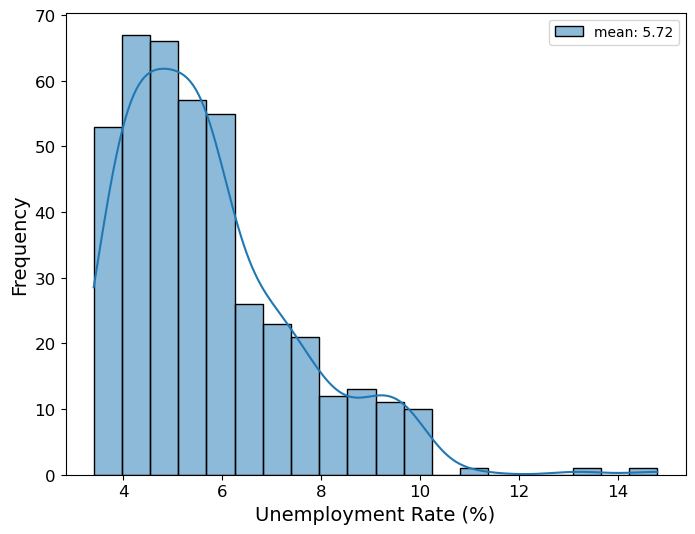

In [49]:
# histogram
fs =16
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.histplot(df_final["unemployment"], bins=20, kde=True, 
             label=f"mean: {df_final["unemployment"].mean().round(2)}")
#plt.title("Distribution of Unemployment Rates", fontsize=16)
plt.xlabel("Unemployment Rate (%)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.savefig("../plot/unemployment_rate_dist.png", dpi=600, bbox_inches="tight")
plt.show()

In [50]:
# skewness
df_final["unemployment"].skew().round(2)

np.float64(1.24)

In [51]:
# kurtosis
df_final["unemployment"].kurtosis().round(2)

np.float64(2.04)

In [52]:
# mean
df_final["unemployment"].mean().round(2)

np.float64(5.72)

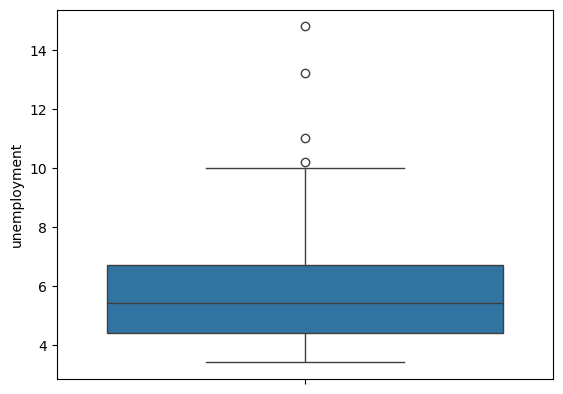

In [53]:
# outlier
sns.boxplot(df_final["unemployment"])
plt.show()

**Insights**
- The average unemployment rate in US is 5.72 % for this time period.
- The histogram and the skewness confirm that the distribution is positively skewed.
- The data has very few outliers.

## Federal Interest Rate

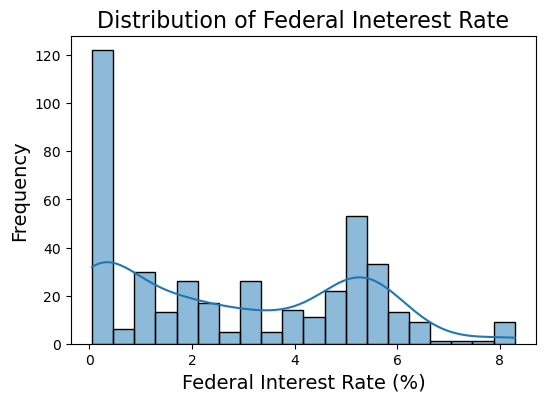

In [54]:
# histogram
plt.figure(figsize=(6, 4))
sns.histplot(df_final["fed_int_rate"], bins=20, kde=True)
plt.title("Distribution of Federal Ineterest Rate", fontsize=16)
plt.xlabel("Federal Interest Rate (%)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [55]:
df_final["ten_year_yield"].value_counts().sort_index()

ten_year_yield
0.62    1
0.64    1
0.66    1
0.68    3
0.69    2
       ..
8.44    2
8.57    3
8.59    2
8.71    1
9.08    1
Name: count, Length: 236, dtype: int64

## Ten Year Bond Yield

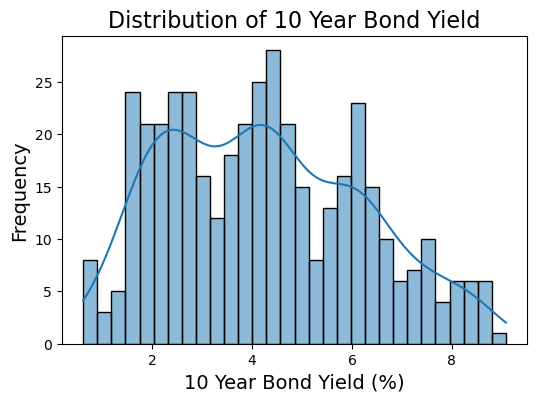

In [56]:
# histogram
plt.figure(figsize=(6, 4))
sns.histplot(df_final["ten_year_yield"], bins=30, kde=True)
plt.title("Distribution of 10 Year Bond Yield", fontsize=16)
plt.xlabel("10 Year Bond Yield (%)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

In [57]:
# mean
df_final["ten_year_yield"].mean().round(2)

np.float64(4.23)

In [58]:
# median
df_final["ten_year_yield"].median()

np.float64(4.06)

## Consumer Sentiment Index

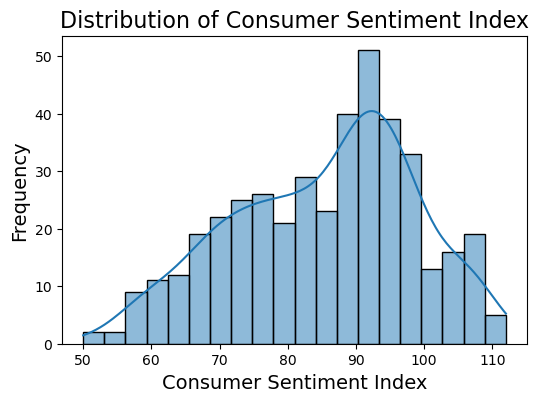

In [59]:
# histogram
plt.figure(figsize=(6, 4))
sns.histplot(df_final["consum_sent_idx"], bins=20, kde=True)
plt.title("Distribution of Consumer Sentiment Index", fontsize=16)
plt.xlabel("Consumer Sentiment Index", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

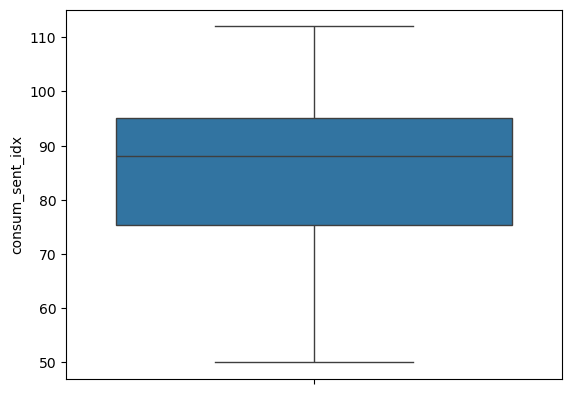

In [60]:
# outlier
sns.boxplot(df_final["consum_sent_idx"])
plt.show()

## Indudtry Production Index

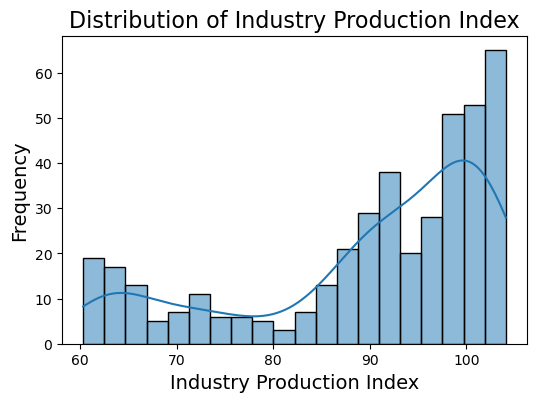

In [61]:
# histogram
plt.figure(figsize=(6, 4))
sns.histplot(df_final["indus_pro_idx"], bins=20, kde=True)
plt.title("Distribution of Industry Production Index", fontsize=16)
plt.xlabel("Industry Production Index", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

## New Home Constructions

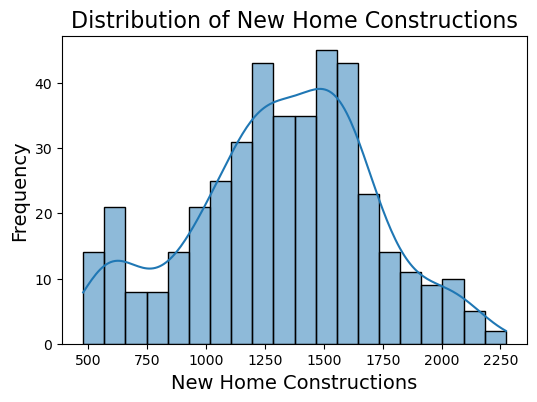

In [62]:
# histogram
plt.figure(figsize=(6, 4))
sns.histplot(df_final["new_home_const"], bins=20, kde=True)
plt.title("Distribution of New Home Constructions", fontsize=16)
plt.xlabel("New Home Constructions", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

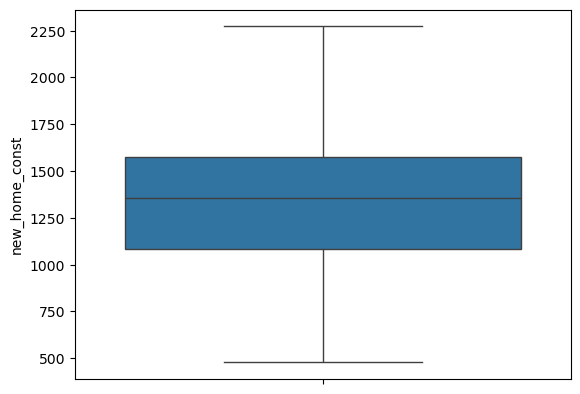

In [63]:
# outlier
sns.boxplot(df_final["new_home_const"])
plt.show()

## VIX

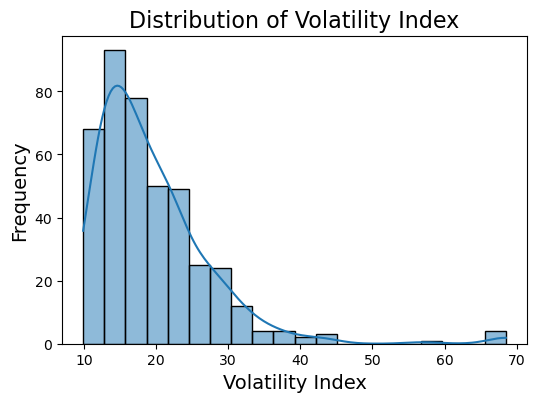

In [64]:
# histogram
plt.figure(figsize=(6, 4))
sns.histplot(df_final["vix"], bins=20, kde=True)
plt.title("Distribution of Volatility Index", fontsize=16)
plt.xlabel("Volatility Index", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

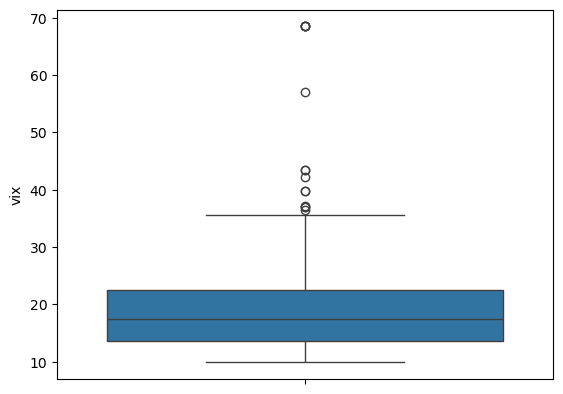

In [65]:
# outlier
sns.boxplot(df_final["vix"])
plt.show()

## Time series line plot

In [66]:
df_final.head(4)

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter
0,1990-02-01,128.0,5.3,5901.810000,8.24,8.42,3179.2,89.5,62.1951,540.796333,622.764333,1437.0,24.87,22.71,328.790009,Feb,1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral,Slowdown,Low,Hawkish,Stable,Q1
1,1990-03-01,128.6,5.2,5930.919000,8.28,8.59,3190.1,91.3,62.4916,543.360667,618.761667,1289.0,21.90,21.19,332.739990,Mar,1990,0.468750,0.493222,0.342854,0.474177,-0.642726,-10.299235,-6.693087,1.201369,Neutral,Expansion,High,Hawkish,Stable,Q1
2,1990-04-01,128.9,5.4,5960.028000,8.26,8.59,3201.6,93.9,62.3511,545.925000,614.759000,1248.0,21.90,21.19,332.739990,Apr,1990,0.233281,0.490801,0.360490,0.471939,-0.646883,-3.180760,0.000000,0.000000,Neutral,Expansion,Moderate,Hawkish,Stable,Q2
3,1990-05-01,129.1,5.4,5978.390667,8.18,9.08,3200.6,90.6,62.5353,548.999667,619.873333,1212.0,18.43,18.76,332.250000,May,1990,0.155159,0.308097,-0.031234,0.563203,0.831925,-2.884615,-11.467673,-0.147259,Neutral,Expansion,Moderate,Hawkish,Stable,Q2


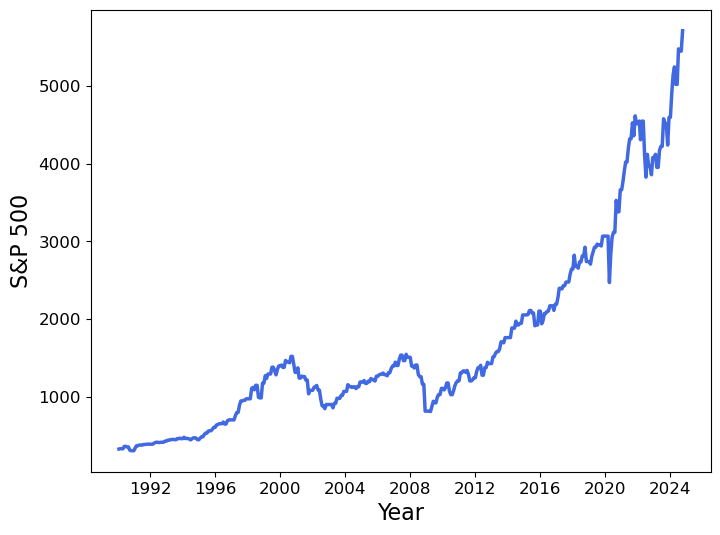

In [67]:
fs =16
plt.figure(figsize=(8, 6))
plt.plot(df_final["date"], df_final["sp_close"], lw=2.5, color="royalblue")
plt.xlabel(r"Year", fontsize=fs)
plt.ylabel(r"S&P 500", fontsize=fs)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("../plot/sp500_ts.png", dpi=600, bbox_inches="tight")
plt.show()

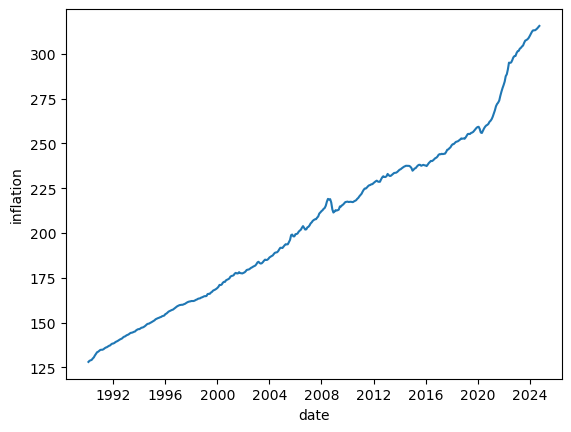

In [68]:
sns.lineplot(data=df_final, x="date", y="inflation")
plt.show()

In [69]:
df_final["sp_close_pct_change"].mean()

np.float64(0.78096981420318)

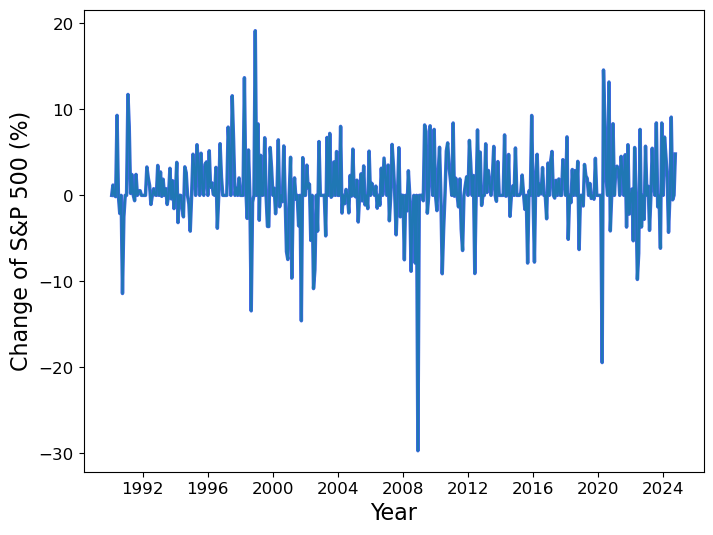

In [70]:
fs =16
plt.figure(figsize=(8, 6))
plt.plot(df_final["date"], df_final["sp_close_pct_change"], lw=2.5, color="royalblue")
plt.xlabel(r"Year", fontsize=fs)
plt.ylabel(r"Change of S&P 500 (%)", fontsize=fs)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.lineplot(data=df_final, x="date", y="sp_close_pct_change")
plt.savefig("../plot/sp500_pct_change.png", dpi=600, bbox_inches="tight")
plt.show()

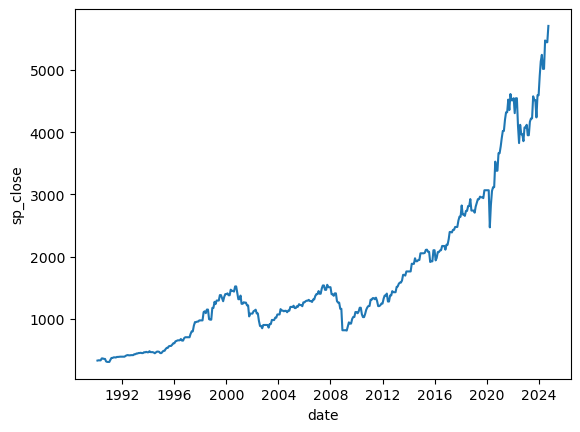

In [71]:
sns.lineplot(data=df_final, x="date", y="sp_close")
plt.show()

# Bivariate Analysis

## Create categorical and numerical dataframes

In [72]:
num = df_final.select_dtypes(include=["number", "datetime"])
cat = df_final.select_dtypes(exclude=["number", "datetime"])

In [73]:
cat

,month,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter
0,Feb,Neutral,Slowdown,Low,Hawkish,Stable,Q1
1,Mar,Neutral,Expansion,High,Hawkish,Stable,Q1
2,Apr,Neutral,Expansion,Moderate,Hawkish,Stable,Q2
3,May,Neutral,Expansion,Moderate,Hawkish,Stable,Q2
4,Jun,Bullish,Expansion,High,Hawkish,Stable,Q2
...,...,...,...,...,...,...,...
412,Jun,Neutral,Expansion,Low,Hawkish,Russia-Ukraine crisis,Q2
413,Jul,Bullish,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3
414,Aug,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3
415,Sep,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3


In [74]:
num

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change
0,1990-02-01,128.000,5.3,5901.810000,8.24,8.42,3179.2,89.5,62.1951,540.796333,622.764333,1437.0,24.87,22.71,328.790009,1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1990-03-01,128.600,5.2,5930.919000,8.28,8.59,3190.1,91.3,62.4916,543.360667,618.761667,1289.0,21.90,21.19,332.739990,1990,0.468750,0.493222,0.342854,0.474177,-0.642726,-10.299235,-6.693087,1.201369
2,1990-04-01,128.900,5.4,5960.028000,8.26,8.59,3201.6,93.9,62.3511,545.925000,614.759000,1248.0,21.90,21.19,332.739990,1990,0.233281,0.490801,0.360490,0.471939,-0.646883,-3.180760,0.000000,0.000000
3,1990-05-01,129.100,5.4,5978.390667,8.18,9.08,3200.6,90.6,62.5353,548.999667,619.873333,1212.0,18.43,18.76,332.250000,1990,0.155159,0.308097,-0.031234,0.563203,0.831925,-2.884615,-11.467673,-0.147259
4,1990-06-01,129.900,5.2,5996.753333,8.29,8.44,3213.7,88.3,62.7479,552.074333,624.987667,1177.0,17.09,17.51,363.160004,1990,0.619675,0.307151,0.409298,0.560049,0.825061,-2.887789,-6.663113,9.303237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2024-06-01,313.131,4.1,29255.514000,5.33,4.63,21079.2,68.2,103.2534,3198.301667,4129.714000,1329.0,15.39,80.70,5018.390137,2024,-0.002874,0.409801,0.315043,0.692323,0.836562,1.064639,0.000000,0.000000
413,2024-07-01,313.566,4.2,29374.914000,5.33,4.48,21093.6,66.4,102.5192,3220.292000,4163.975000,1262.0,12.22,84.70,5475.089844,2024,0.138919,0.408128,0.068314,0.687563,0.829622,-5.041384,4.956629,9.100522
414,2024-08-01,314.131,4.2,29489.825000,5.33,3.99,21182.5,67.9,103.0196,3219.728000,4159.203000,1379.0,18.59,77.74,5446.680176,2024,0.180185,0.391188,0.421455,-0.017514,-0.114602,9.270998,-8.217237,-0.518890
415,2024-09-01,314.851,4.1,29604.736000,5.13,3.99,21252.4,70.1,102.5873,3219.164000,4154.431000,1355.0,18.59,77.74,5446.680176,2024,0.229204,0.389663,0.329989,-0.017517,-0.114734,-1.740392,0.000000,0.000000


## Categorical vs Categorical

In [75]:
cat

,month,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter
0,Feb,Neutral,Slowdown,Low,Hawkish,Stable,Q1
1,Mar,Neutral,Expansion,High,Hawkish,Stable,Q1
2,Apr,Neutral,Expansion,Moderate,Hawkish,Stable,Q2
3,May,Neutral,Expansion,Moderate,Hawkish,Stable,Q2
4,Jun,Bullish,Expansion,High,Hawkish,Stable,Q2
...,...,...,...,...,...,...,...
412,Jun,Neutral,Expansion,Low,Hawkish,Russia-Ukraine crisis,Q2
413,Jul,Bullish,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3
414,Aug,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3
415,Sep,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3


In [76]:
cat.columns

Index(['month', 'market_trend', 'economic_cycle', 'inflation_category',
       'interest_rate_category', 'crisis_period', 'quarter'],
      dtype='object')

In [77]:
crosstab_result_1 = pd.crosstab(cat["economic_cycle"], cat["interest_rate_category"])
crosstab_result_1

interest_rate_category,Dovish,Hawkish,Neutral
economic_cycle,,,
Boom,12,3,0
Expansion,166,149,62
Recession,11,0,1
Slowdown,3,7,3


From the crosstab between `economic cycle` and `interest`, we observe the following:
- During `Recession` and during `Economic Boom`, the Fed interest rate was low, leading to 
more money flow into the market.

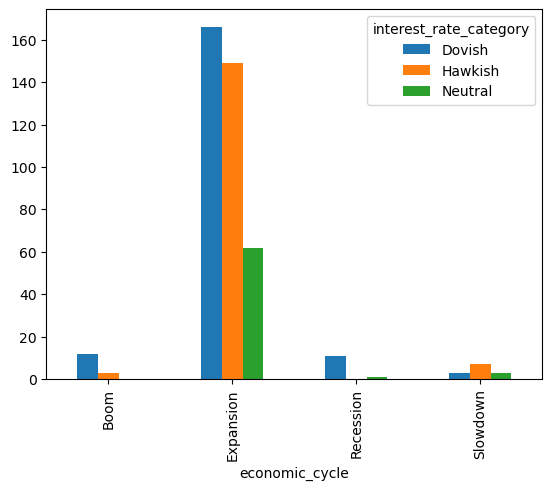

In [78]:
crosstab_result_1.plot(kind="bar")
plt.show()

In [79]:
crosstab_result_2 = pd.crosstab(cat["market_trend"], cat["inflation_category"])
crosstab_result_2

inflation_category,High,Low,Moderate
market_trend,,,
Bearish,18,21,18
Bullish,53,27,46
Neutral,100,61,73


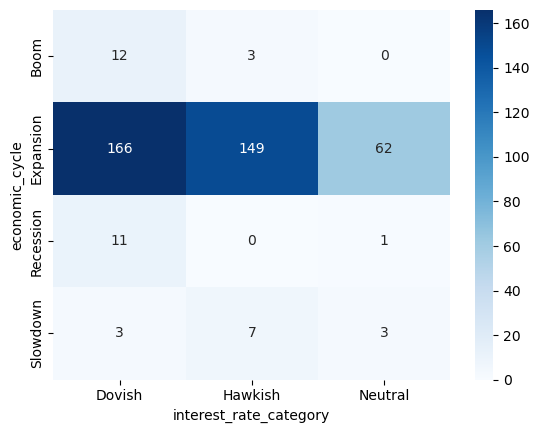

In [80]:
sns.heatmap(crosstab_result_1, annot=True, cmap="Blues", fmt="d")
plt.show()

## Chi-square tests

In [81]:
crosstab_result_1

interest_rate_category,Dovish,Hawkish,Neutral
economic_cycle,,,
Boom,12,3,0
Expansion,166,149,62
Recession,11,0,1
Slowdown,3,7,3


In [82]:
# Chi-square test for 'economic_cycle' and 'interest_rate_category'
chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result_1)

In [83]:
chi2_pvalue

np.float64(0.0016699553361045453)

The p value is less than 0.05. This suggests that there is significant association between interest_rate_category and economic_cycle.

## Cramér's V

In [84]:
from scipy.stats.contingency import association

In [85]:
# Computing the association between variables in 'crosstab_result_1' using the "cramer" method
association(crosstab_result_1, method='cramer')

0.15953726403164134

The Cramer value 0.148 suggests that there is weak association between two variables.

# Categorical vs Continuous

In [86]:
cat

,month,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter
0,Feb,Neutral,Slowdown,Low,Hawkish,Stable,Q1
1,Mar,Neutral,Expansion,High,Hawkish,Stable,Q1
2,Apr,Neutral,Expansion,Moderate,Hawkish,Stable,Q2
3,May,Neutral,Expansion,Moderate,Hawkish,Stable,Q2
4,Jun,Bullish,Expansion,High,Hawkish,Stable,Q2
...,...,...,...,...,...,...,...
412,Jun,Neutral,Expansion,Low,Hawkish,Russia-Ukraine crisis,Q2
413,Jul,Bullish,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3
414,Aug,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3
415,Sep,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3


In [87]:
num

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change
0,1990-02-01,128.000,5.3,5901.810000,8.24,8.42,3179.2,89.5,62.1951,540.796333,622.764333,1437.0,24.87,22.71,328.790009,1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1990-03-01,128.600,5.2,5930.919000,8.28,8.59,3190.1,91.3,62.4916,543.360667,618.761667,1289.0,21.90,21.19,332.739990,1990,0.468750,0.493222,0.342854,0.474177,-0.642726,-10.299235,-6.693087,1.201369
2,1990-04-01,128.900,5.4,5960.028000,8.26,8.59,3201.6,93.9,62.3511,545.925000,614.759000,1248.0,21.90,21.19,332.739990,1990,0.233281,0.490801,0.360490,0.471939,-0.646883,-3.180760,0.000000,0.000000
3,1990-05-01,129.100,5.4,5978.390667,8.18,9.08,3200.6,90.6,62.5353,548.999667,619.873333,1212.0,18.43,18.76,332.250000,1990,0.155159,0.308097,-0.031234,0.563203,0.831925,-2.884615,-11.467673,-0.147259
4,1990-06-01,129.900,5.2,5996.753333,8.29,8.44,3213.7,88.3,62.7479,552.074333,624.987667,1177.0,17.09,17.51,363.160004,1990,0.619675,0.307151,0.409298,0.560049,0.825061,-2.887789,-6.663113,9.303237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2024-06-01,313.131,4.1,29255.514000,5.33,4.63,21079.2,68.2,103.2534,3198.301667,4129.714000,1329.0,15.39,80.70,5018.390137,2024,-0.002874,0.409801,0.315043,0.692323,0.836562,1.064639,0.000000,0.000000
413,2024-07-01,313.566,4.2,29374.914000,5.33,4.48,21093.6,66.4,102.5192,3220.292000,4163.975000,1262.0,12.22,84.70,5475.089844,2024,0.138919,0.408128,0.068314,0.687563,0.829622,-5.041384,4.956629,9.100522
414,2024-08-01,314.131,4.2,29489.825000,5.33,3.99,21182.5,67.9,103.0196,3219.728000,4159.203000,1379.0,18.59,77.74,5446.680176,2024,0.180185,0.391188,0.421455,-0.017514,-0.114602,9.270998,-8.217237,-0.518890
415,2024-09-01,314.851,4.1,29604.736000,5.13,3.99,21252.4,70.1,102.5873,3219.164000,4154.431000,1355.0,18.59,77.74,5446.680176,2024,0.229204,0.389663,0.329989,-0.017517,-0.114734,-1.740392,0.000000,0.000000


/tmp/ipykernel_4390/490440821.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x="crisis_period", y="sp_close_pct_change",


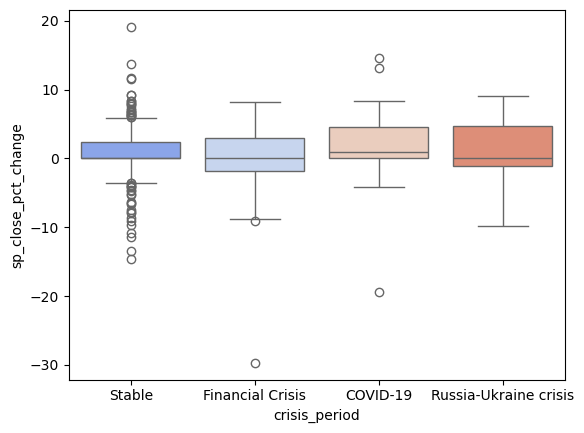

In [88]:
sns.boxplot(data=df_final, x="crisis_period", y="sp_close_pct_change", 
            palette="coolwarm")
plt.show()

### Correlation Matrix

In [89]:
cor_mat_pearson = num.corr(method="pearson").round(2)

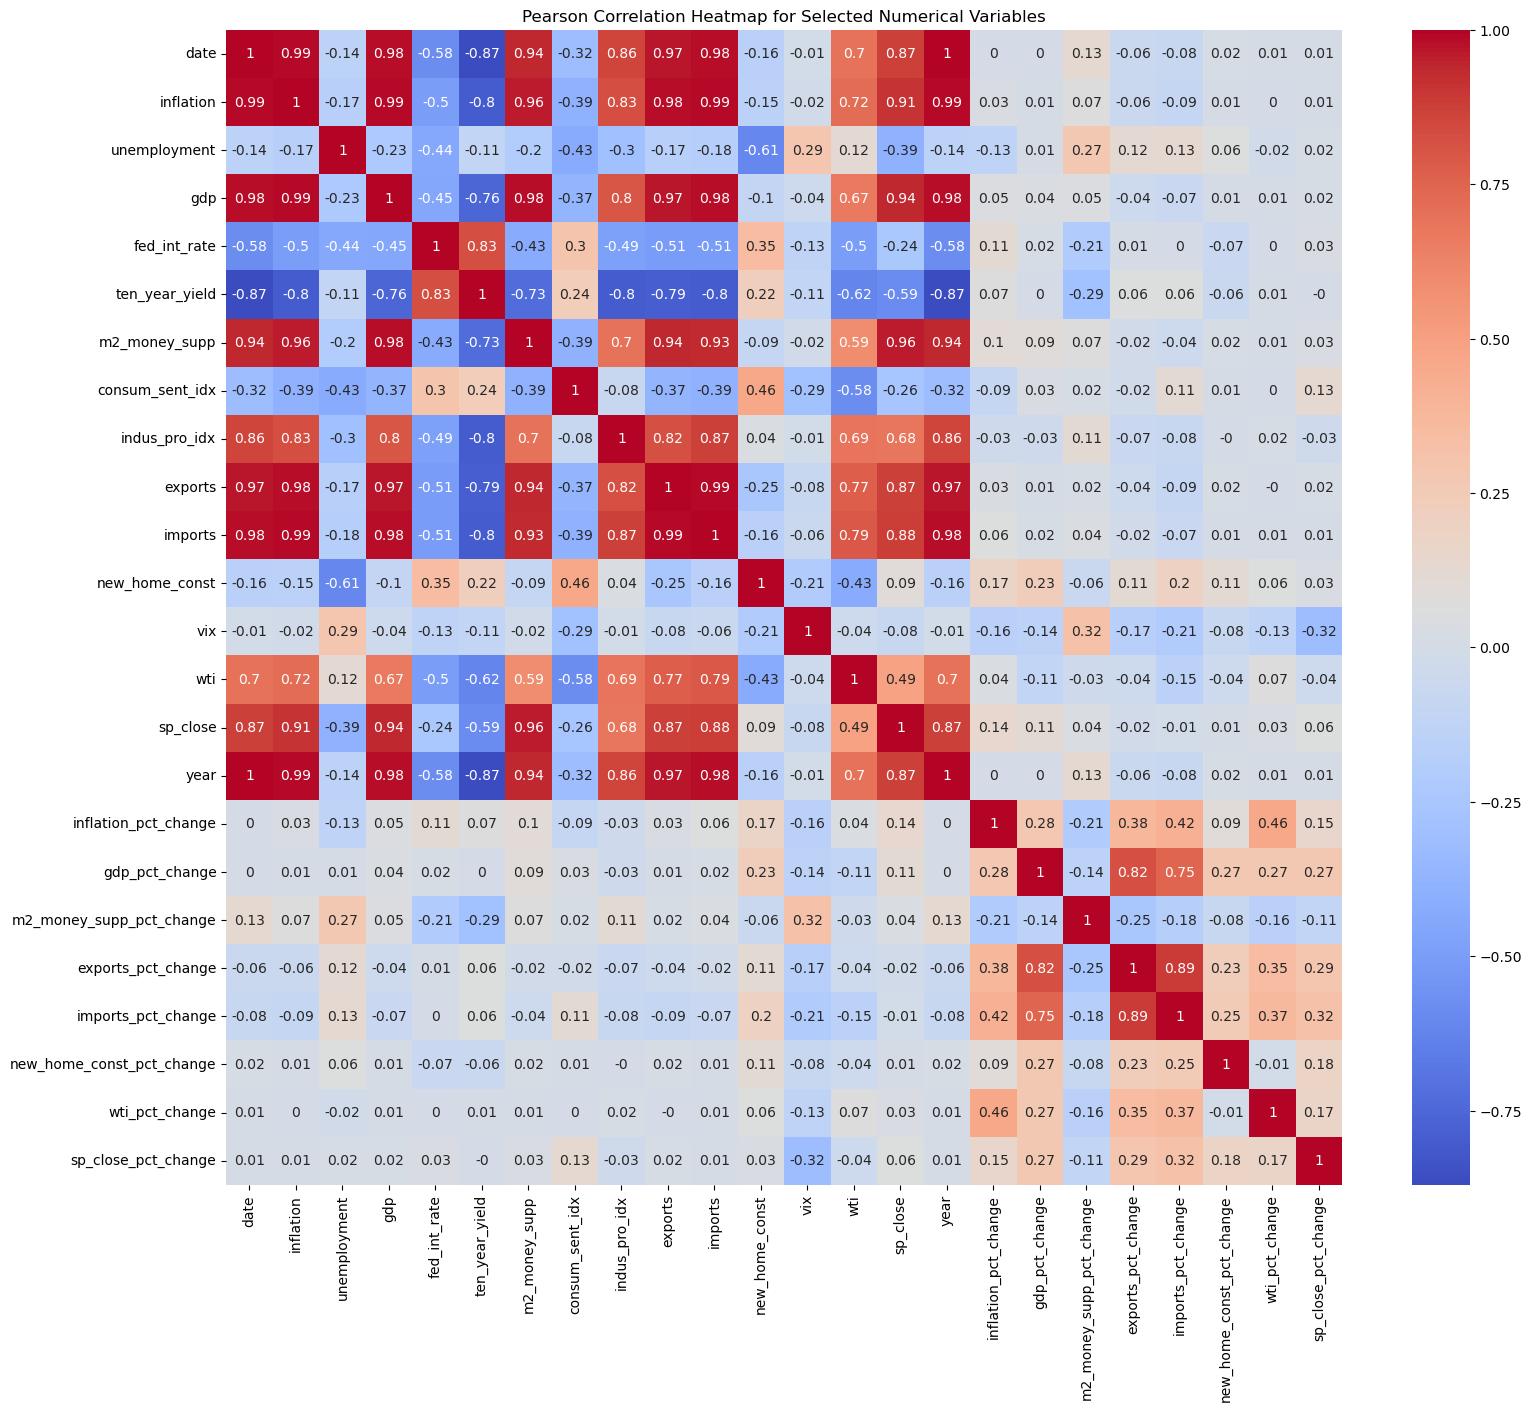

In [90]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(cor_mat_pearson, annot=True, cmap="coolwarm")

plt.title("Pearson Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [91]:
cor_mat_spearman = num.corr(method="spearman").round(2)

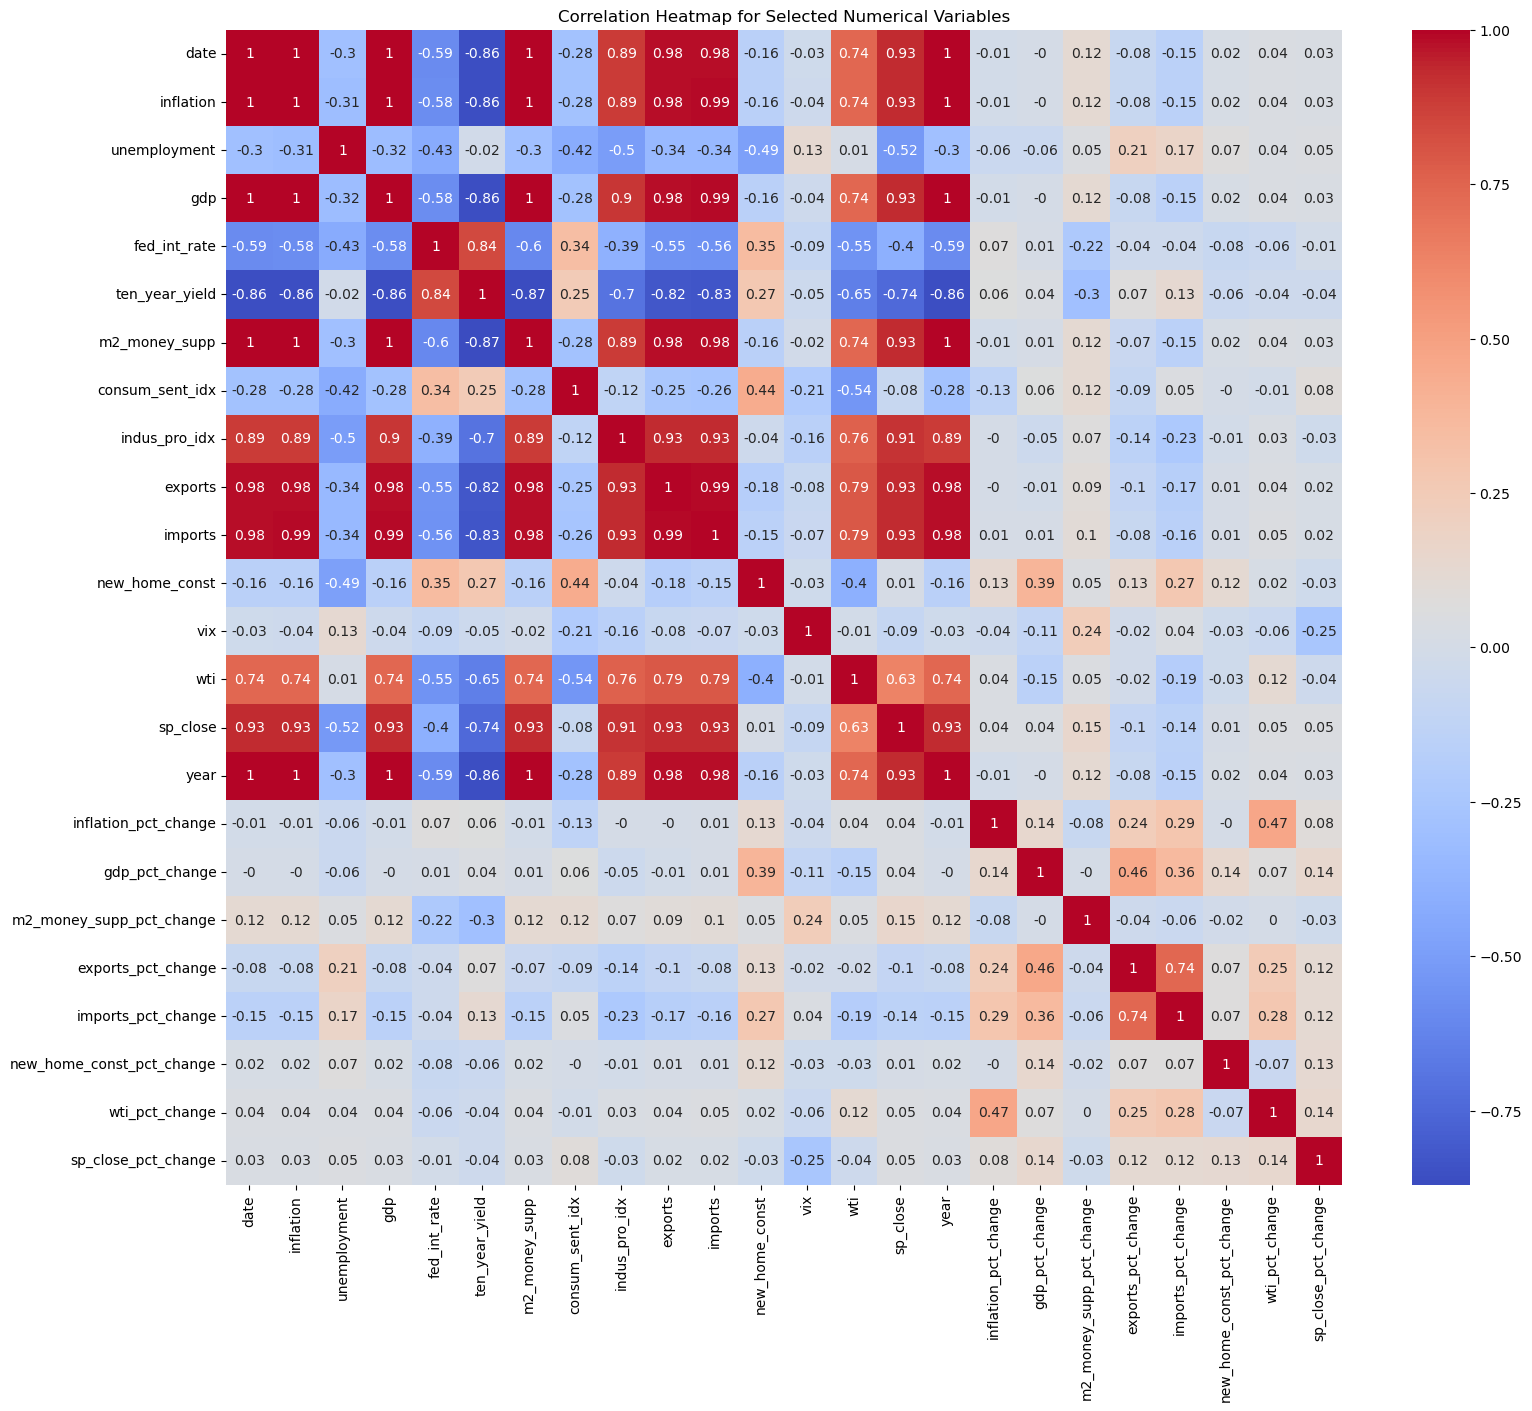

In [117]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(cor_mat_spearman, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

**Insights**
- **Strong Positive Correlation**: My main target is `sp_close` here. It shows strong correlations with `year`, `inflation`, `gdp`, `ten_year_yield`, `m2_money_supply`, `indus_pro_idx`, `exports`, `imports` and `wti`.

### Scatter Plots

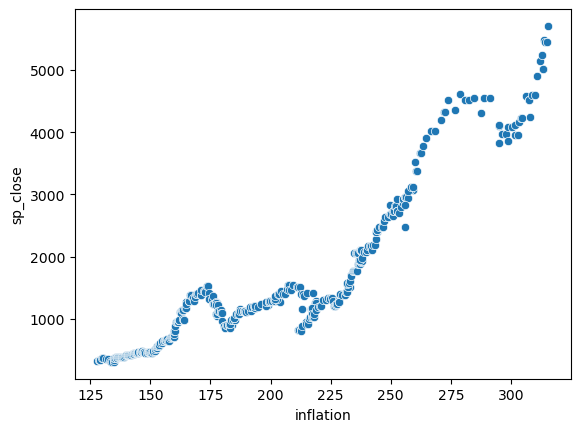

In [92]:
# Plotting a scatter plot to visualize the relationship between 'inflation' and 'sp_close'
sns.scatterplot(data=num, x='inflation', y='sp_close')
plt.show()

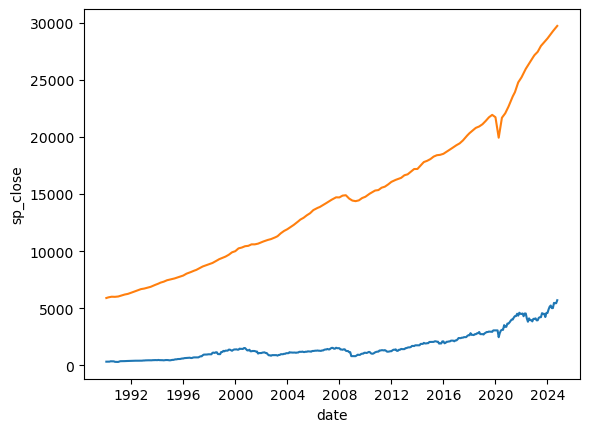

In [95]:
sns.lineplot(data=num, x='date', y='sp_close')
sns.lineplot(data=num, x='date', y='gdp')
plt.show()

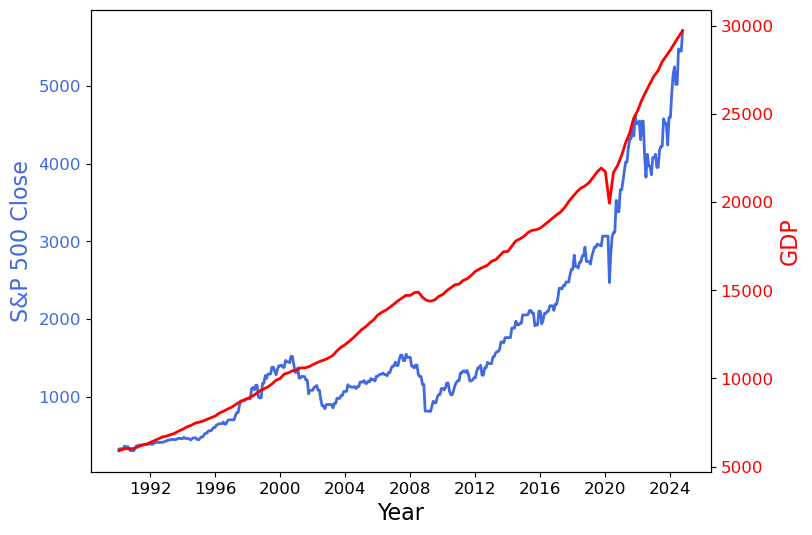

In [118]:
fs=16
fig, ax1 = plt.subplots(figsize=(8, 6))

sns.lineplot(data=num, x='date', y='sp_close', ax=ax1, color='royalblue', lw=2)
ax1.set_ylabel('S&P 500 Close', color='royalblue', fontsize=fs)
ax1.tick_params(axis='y', labelcolor='royalblue', labelsize=12)
ax1.set_xlabel("Year", fontsize=fs)
ax1.tick_params(axis="x", labelsize=12)

ax2 = ax1.twinx()

# Plot GDP on Secondary Y-Axis
sns.lineplot(data=num, x='date', y='gdp', ax=ax2, color='r', lw=2)
ax2.set_ylabel('GDP', color='r', fontsize=fs)
ax2.tick_params(axis='y', labelcolor='r', labelsize=12)
plt.savefig("../plot/dynamic_correlation.png", dpi=600, bbox_inches="tight")
plt.show()

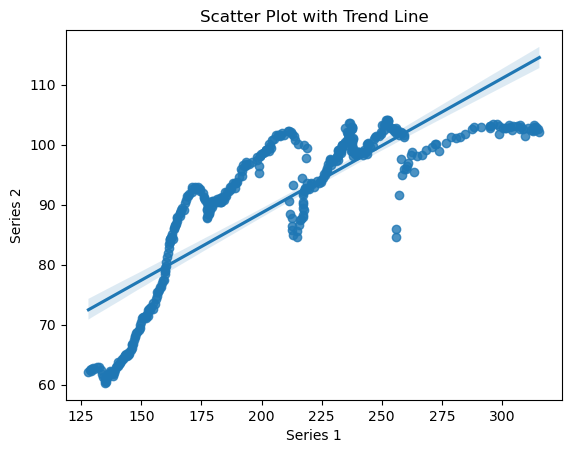

In [80]:
sns.regplot(x=num["inflation"], y=num["indus_pro_idx"])
plt.xlabel("Series 1")
plt.ylabel("Series 2")
plt.title("Scatter Plot with Trend Line")
plt.show()

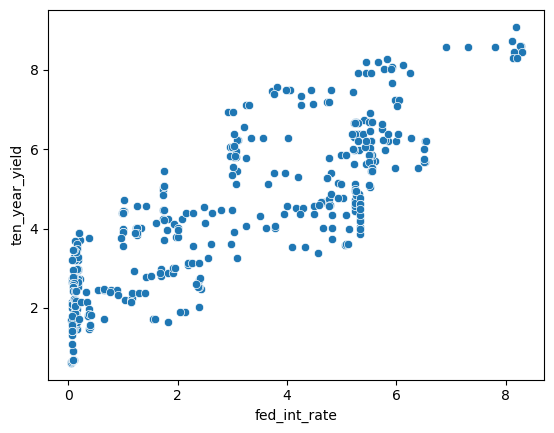

In [81]:
# Plotting a scatter plot to visualize the relationship between 'inflation' and 'sp_close'
sns.scatterplot(data=df_final, x='fed_int_rate', y='ten_year_yield')
plt.show()

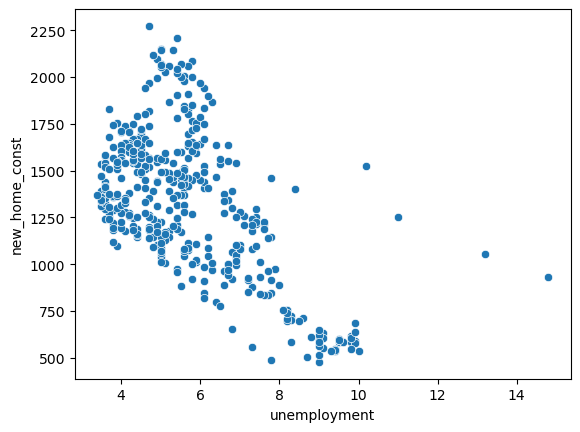

In [82]:
# Plotting a scatter plot to visualize the relationship between 'inflation' and 'sp_close'
sns.scatterplot(data=df_final, x='unemployment', y='new_home_const')
plt.show()

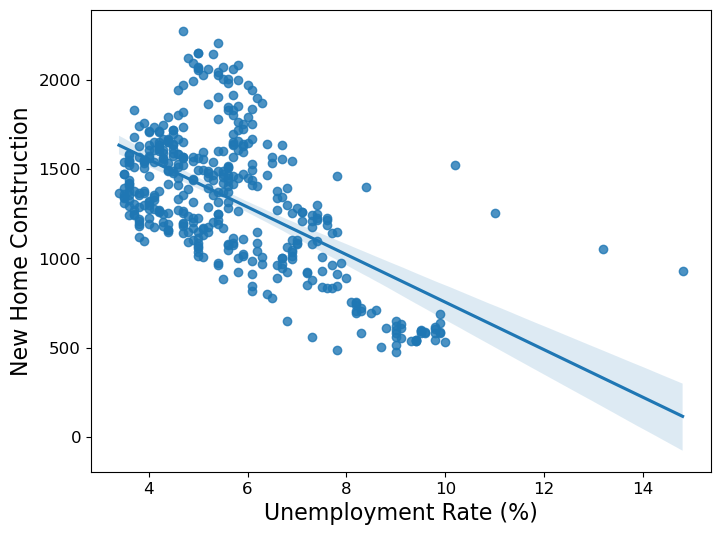

In [121]:
# Plotting a scatter plot to visualize the relationship between 'inflation' and 'sp_close'
fs =16
plt.figure(figsize=(8, 6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.regplot(data=df_final, x='unemployment', y='new_home_const')
plt.xlabel("Unemployment Rate (%)", fontsize=fs)
plt.ylabel("New Home Construction", fontsize=fs)
plt.savefig("../plot/static_corr.png", dpi=600, bbox_inches="tight")
plt.show()

/tmp/ipykernel_89985/4012647742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['infl_sp_roll_corr'] = df_final['inflation'].rolling(window=rolling_window).corr(df_final['sp_close'])


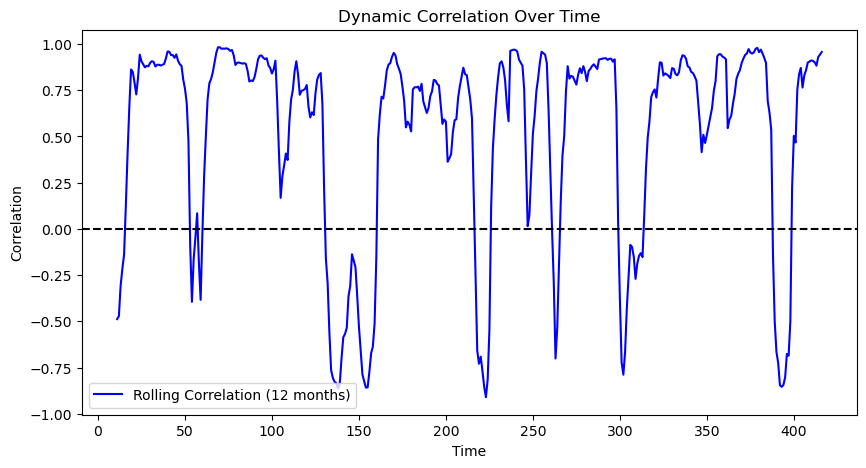

In [84]:
# Assume df contains two time series columns: "series1" and "series2"
rolling_window = 12  # Adjust based on your time frame (e.g., months, quarters)
df_final['infl_sp_roll_corr'] = df_final['inflation'].rolling(window=rolling_window).corr(df_final['sp_close'])

# Plot dynamic correlation over time
plt.figure(figsize=(10,5))
plt.plot(df_final['infl_sp_roll_corr'], label=f'Rolling Correlation ({rolling_window} months)', color='b')
plt.axhline(0, color='black', linestyle='dashed')
plt.title("Dynamic Correlation Over Time")
plt.xlabel("Time")
plt.ylabel("Correlation")
plt.legend()
plt.show()

In [85]:
df_final

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter,infl_sp_roll_corr
0,1990-02-01,128.000,5.3,5901.810000,8.24,8.42,3179.2,89.5,62.1951,540.796333,622.764333,1437.0,24.87,22.71,328.790009,Feb,1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral,Slowdown,Low,Hawkish,Stable,Q1,NaN
1,1990-03-01,128.600,5.2,5930.919000,8.28,8.59,3190.1,91.3,62.4916,543.360667,618.761667,1289.0,21.90,21.19,332.739990,Mar,1990,0.468750,0.493222,0.342854,0.474177,-0.642726,-10.299235,-6.693087,1.201369,Neutral,Expansion,High,Hawkish,Stable,Q1,NaN
2,1990-04-01,128.900,5.4,5960.028000,8.26,8.59,3201.6,93.9,62.3511,545.925000,614.759000,1248.0,21.90,21.19,332.739990,Apr,1990,0.233281,0.490801,0.360490,0.471939,-0.646883,-3.180760,0.000000,0.000000,Neutral,Expansion,Moderate,Hawkish,Stable,Q2,NaN
3,1990-05-01,129.100,5.4,5978.390667,8.18,9.08,3200.6,90.6,62.5353,548.999667,619.873333,1212.0,18.43,18.76,332.250000,May,1990,0.155159,0.308097,-0.031234,0.563203,0.831925,-2.884615,-11.467673,-0.147259,Neutral,Expansion,Moderate,Hawkish,Stable,Q2,NaN
4,1990-06-01,129.900,5.2,5996.753333,8.29,8.44,3213.7,88.3,62.7479,552.074333,624.987667,1177.0,17.09,17.51,363.160004,Jun,1990,0.619675,0.307151,0.409298,0.560049,0.825061,-2.887789,-6.663113,9.303237,Bullish,Expansion,High,Hawkish,Stable,Q2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2024-06-01,313.131,4.1,29255.514000,5.33,4.63,21079.2,68.2,103.2534,3198.301667,4129.714000,1329.0,15.39,80.70,5018.390137,Jun,2024,-0.002874,0.409801,0.315043,0.692323,0.836562,1.064639,0.000000,0.000000,Neutral,Expansion,Low,Hawkish,Russia-Ukraine crisis,Q2,0.901289
413,2024-07-01,313.566,4.2,29374.914000,5.33,4.48,21093.6,66.4,102.5192,3220.292000,4163.975000,1262.0,12.22,84.70,5475.089844,Jul,2024,0.138919,0.408128,0.068314,0.687563,0.829622,-5.041384,4.956629,9.100522,Bullish,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3,0.883157
414,2024-08-01,314.131,4.2,29489.825000,5.33,3.99,21182.5,67.9,103.0196,3219.728000,4159.203000,1379.0,18.59,77.74,5446.680176,Aug,2024,0.180185,0.391188,0.421455,-0.017514,-0.114602,9.270998,-8.217237,-0.518890,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3,0.930123
415,2024-09-01,314.851,4.1,29604.736000,5.13,3.99,21252.4,70.1,102.5873,3219.164000,4154.431000,1355.0,18.59,77.74,5446.680176,Sep,2024,0.229204,0.389663,0.329989,-0.017517,-0.114734,-1.740392,0.000000,0.000000,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3,0.942775


In [86]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       417 non-null    datetime64[ns]
 1   inflation                  417 non-null    float64       
 2   unemployment               417 non-null    float64       
 3   gdp                        417 non-null    float64       
 4   fed_int_rate               417 non-null    float64       
 5   ten_year_yield             417 non-null    float64       
 6   m2_money_supp              417 non-null    float64       
 7   consum_sent_idx            417 non-null    float64       
 8   indus_pro_idx              417 non-null    float64       
 9   exports                    417 non-null    float64       
 10  imports                    417 non-null    float64       
 11  new_home_const             417 non-null    float64       
 12  vix     

In [87]:
df_final.reset_index(drop=True, inplace=True)
df_final

,date,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close,month,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter,infl_sp_roll_corr
0,1990-02-01,128.000,5.3,5901.810000,8.24,8.42,3179.2,89.5,62.1951,540.796333,622.764333,1437.0,24.87,22.71,328.790009,Feb,1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral,Slowdown,Low,Hawkish,Stable,Q1,NaN
1,1990-03-01,128.600,5.2,5930.919000,8.28,8.59,3190.1,91.3,62.4916,543.360667,618.761667,1289.0,21.90,21.19,332.739990,Mar,1990,0.468750,0.493222,0.342854,0.474177,-0.642726,-10.299235,-6.693087,1.201369,Neutral,Expansion,High,Hawkish,Stable,Q1,NaN
2,1990-04-01,128.900,5.4,5960.028000,8.26,8.59,3201.6,93.9,62.3511,545.925000,614.759000,1248.0,21.90,21.19,332.739990,Apr,1990,0.233281,0.490801,0.360490,0.471939,-0.646883,-3.180760,0.000000,0.000000,Neutral,Expansion,Moderate,Hawkish,Stable,Q2,NaN
3,1990-05-01,129.100,5.4,5978.390667,8.18,9.08,3200.6,90.6,62.5353,548.999667,619.873333,1212.0,18.43,18.76,332.250000,May,1990,0.155159,0.308097,-0.031234,0.563203,0.831925,-2.884615,-11.467673,-0.147259,Neutral,Expansion,Moderate,Hawkish,Stable,Q2,NaN
4,1990-06-01,129.900,5.2,5996.753333,8.29,8.44,3213.7,88.3,62.7479,552.074333,624.987667,1177.0,17.09,17.51,363.160004,Jun,1990,0.619675,0.307151,0.409298,0.560049,0.825061,-2.887789,-6.663113,9.303237,Bullish,Expansion,High,Hawkish,Stable,Q2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2024-06-01,313.131,4.1,29255.514000,5.33,4.63,21079.2,68.2,103.2534,3198.301667,4129.714000,1329.0,15.39,80.70,5018.390137,Jun,2024,-0.002874,0.409801,0.315043,0.692323,0.836562,1.064639,0.000000,0.000000,Neutral,Expansion,Low,Hawkish,Russia-Ukraine crisis,Q2,0.901289
413,2024-07-01,313.566,4.2,29374.914000,5.33,4.48,21093.6,66.4,102.5192,3220.292000,4163.975000,1262.0,12.22,84.70,5475.089844,Jul,2024,0.138919,0.408128,0.068314,0.687563,0.829622,-5.041384,4.956629,9.100522,Bullish,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3,0.883157
414,2024-08-01,314.131,4.2,29489.825000,5.33,3.99,21182.5,67.9,103.0196,3219.728000,4159.203000,1379.0,18.59,77.74,5446.680176,Aug,2024,0.180185,0.391188,0.421455,-0.017514,-0.114602,9.270998,-8.217237,-0.518890,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3,0.930123
415,2024-09-01,314.851,4.1,29604.736000,5.13,3.99,21252.4,70.1,102.5873,3219.164000,4154.431000,1355.0,18.59,77.74,5446.680176,Sep,2024,0.229204,0.389663,0.329989,-0.017517,-0.114734,-1.740392,0.000000,0.000000,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3,0.942775


In [88]:
df_final.insert(1, "month", df_final.pop("month"))

In [89]:
df_final

,date,month,inflation,unemployment,gdp,fed_int_rate,ten_year_yield,m2_money_supp,consum_sent_idx,indus_pro_idx,exports,imports,new_home_const,vix,wti,sp_close,year,inflation_pct_change,gdp_pct_change,m2_money_supp_pct_change,exports_pct_change,imports_pct_change,new_home_const_pct_change,wti_pct_change,sp_close_pct_change,market_trend,economic_cycle,inflation_category,interest_rate_category,crisis_period,quarter,infl_sp_roll_corr
0,1990-02-01,Feb,128.000,5.3,5901.810000,8.24,8.42,3179.2,89.5,62.1951,540.796333,622.764333,1437.0,24.87,22.71,328.790009,1990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Neutral,Slowdown,Low,Hawkish,Stable,Q1,NaN
1,1990-03-01,Mar,128.600,5.2,5930.919000,8.28,8.59,3190.1,91.3,62.4916,543.360667,618.761667,1289.0,21.90,21.19,332.739990,1990,0.468750,0.493222,0.342854,0.474177,-0.642726,-10.299235,-6.693087,1.201369,Neutral,Expansion,High,Hawkish,Stable,Q1,NaN
2,1990-04-01,Apr,128.900,5.4,5960.028000,8.26,8.59,3201.6,93.9,62.3511,545.925000,614.759000,1248.0,21.90,21.19,332.739990,1990,0.233281,0.490801,0.360490,0.471939,-0.646883,-3.180760,0.000000,0.000000,Neutral,Expansion,Moderate,Hawkish,Stable,Q2,NaN
3,1990-05-01,May,129.100,5.4,5978.390667,8.18,9.08,3200.6,90.6,62.5353,548.999667,619.873333,1212.0,18.43,18.76,332.250000,1990,0.155159,0.308097,-0.031234,0.563203,0.831925,-2.884615,-11.467673,-0.147259,Neutral,Expansion,Moderate,Hawkish,Stable,Q2,NaN
4,1990-06-01,Jun,129.900,5.2,5996.753333,8.29,8.44,3213.7,88.3,62.7479,552.074333,624.987667,1177.0,17.09,17.51,363.160004,1990,0.619675,0.307151,0.409298,0.560049,0.825061,-2.887789,-6.663113,9.303237,Bullish,Expansion,High,Hawkish,Stable,Q2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,2024-06-01,Jun,313.131,4.1,29255.514000,5.33,4.63,21079.2,68.2,103.2534,3198.301667,4129.714000,1329.0,15.39,80.70,5018.390137,2024,-0.002874,0.409801,0.315043,0.692323,0.836562,1.064639,0.000000,0.000000,Neutral,Expansion,Low,Hawkish,Russia-Ukraine crisis,Q2,0.901289
413,2024-07-01,Jul,313.566,4.2,29374.914000,5.33,4.48,21093.6,66.4,102.5192,3220.292000,4163.975000,1262.0,12.22,84.70,5475.089844,2024,0.138919,0.408128,0.068314,0.687563,0.829622,-5.041384,4.956629,9.100522,Bullish,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3,0.883157
414,2024-08-01,Aug,314.131,4.2,29489.825000,5.33,3.99,21182.5,67.9,103.0196,3219.728000,4159.203000,1379.0,18.59,77.74,5446.680176,2024,0.180185,0.391188,0.421455,-0.017514,-0.114602,9.270998,-8.217237,-0.518890,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3,0.930123
415,2024-09-01,Sep,314.851,4.1,29604.736000,5.13,3.99,21252.4,70.1,102.5873,3219.164000,4154.431000,1355.0,18.59,77.74,5446.680176,2024,0.229204,0.389663,0.329989,-0.017517,-0.114734,-1.740392,0.000000,0.000000,Neutral,Expansion,Moderate,Hawkish,Russia-Ukraine crisis,Q3,0.942775


In [90]:
df_final.insert(1, "year", df_final.pop("year"))